In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random as rand

## Selecting Image points for calib-object

In [3]:
#%matplotlib tk
#image_points = []
#fig = plt.figure(figsize=(20,30))

#img=mpimg.imread('../calibration-data/calib-object.jpg')

#def onclick(event):
#    ix, iy = event.xdata, event.ydata
#    print(ix, iy)
#    image_points.append([ix, iy])

#cid = fig.canvas.mpl_connect('button_press_event', onclick)

#imgplot = plt.imshow(img)
#plt.show()

## 2D Image points

In [4]:
image_points = []
image_points.append([1550.4366113200617,1591.821543239807])
image_points.append([1664.921520961379,1613.628192695296])
image_points.append([1806.6647424220569,1629.9831797869128])
image_points.append([1937.5046391549909,1651.789829242402])
image_points.append([2090.1511853434145,1668.1448163340187])
image_points.append([2248.249393895709,1684.4998034256355])
image_points.append([2422.7025895396214,1700.8547905172522])
image_points.append([2618.9624346390224,1733.5647647004857])
image_points.append([1555.8882736839337,1760.8230765198468])
image_points.append([1550.4366113200617,1924.3729474360143])
image_points.append([1550.4366113200617,2077.0194936244375])
image_points.append([1544.9849489561889,2240.569364540605])
image_points.append([1550.4366113200617,2398.6675730929005])
image_points.append([1544.9849489561889,2556.7657816451956])
image_points.append([1555.8882736839337,2698.5090031058744])
image_points.append([1544.9849489561889,2851.1555492942975])
image_points.append([1550.4366113200617,2987.447108391104])
image_points.append([1425.0483769509997,1608.1765303314237])
image_points.append([1288.7568178541928,1629.9831797869128])
image_points.append([1136.1102716657701,1646.3381668785296])
image_points.append([983.4637254773475,1668.1448163340187])
image_points.append([809.0105298334352,1679.048141061763])
image_points.append([623.654009461779,1706.3064528811242])
image_points.append([432.8458267262499,1722.661439972741])

#image points as numpy array
x = np.array(image_points)

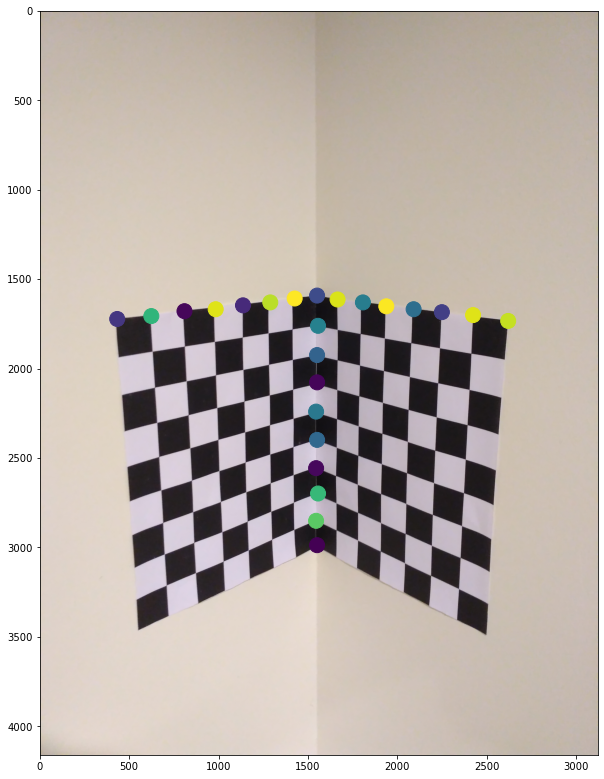

In [5]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('../calibration-data/calib-object.jpg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

## 3D World Coordinates

In [6]:
# X represents the 3D world points
X = []
#x-axis points
X.append([0,0,0]);
X.append([1,0,0]);
X.append([2,0,0]);
X.append([3,0,0]);
X.append([4,0,0]);
X.append([5,0,0]);
X.append([6,0,0]);
X.append([7,0,0]);
#y-axis
X.append([0,1,0]);
X.append([0,2,0]);
X.append([0,3,0]);
X.append([0,4,0]);
X.append([0,5,0]);
X.append([0,6,0]);
X.append([0,7,0]);
X.append([0,8,0]);
X.append([0,9,0]);
#z-axis
X.append([0,0,1]);
X.append([0,0,2]);
X.append([0,0,3]);
X.append([0,0,4]);
X.append([0,0,5]);
X.append([0,0,6]);
X.append([0,0,7]);

#world points as numpy array
X_1 = 28*np.array(X);
X_2 = 2800*np.array(X);

## Homogenising Coordinates

In [7]:
#appends a ones column to input
def hom_coords_X(X):
    n = X.shape[0]
    size = (n,1)
    ones = np.ones(size)
    X = np.concatenate(
        (X,ones),
        axis = 1)
    return X

def hom_coords_x(x):
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate(
        (x,ones),
        axis = 1)
    return x

x = hom_coords_x(x)
X_1 = hom_coords_X(X_1)
X_2 = hom_coords_X(X_2)

# Q1) DLT

# 1.1) Finding the Projection matrix and reconstruction error

## Performing DLT

In [8]:
#DLT function takes as input 
#the image points and world points
#return a 3x4 matrix

def DLT(x,X):
    M = [];
    zeros = np.zeros(4);
    L = len(X);
    for i in range(L):
        M.append(np.hstack((-X[i],np.hstack((zeros,x[i][0]*X[i])))));
        M.append(np.hstack((zeros,np.hstack((-X[i],x[i][1]*X[i])))));
    M = np.array(M).reshape(2*L,12);
    U,D,VT= np.linalg.svd(M);
    P = np.array(VT[-1]).reshape(3,4);
    P = P/P[-1,-1]
    return P

## Performing Reconstruction

In [9]:
#Get reprojected points
def get_points(P,X):
    points = P@X.T
    points = points/points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    x = x[:,0:2];
    err = np.sqrt(np.sum((x-points)**2)/2/len(x))
    return err

## Normalizing the data points

In [10]:
#Finding average of image points and mean distance
avg_x = np.mean(x,axis = 0)
d_x = np.linalg.norm(x-avg_x)


#Finding average of World points and mean distance for 28x28
avg_X_1 = np.mean(X_1,axis = 0)
d_X_1 = np.linalg.norm(X_1-avg_X_1)

#Finding average of World points and mean distance for 2800x2800
avg_X_2 = np.mean(X_2,axis = 0)
d_X_2 = np.linalg.norm(X_2-avg_X_2)

k1 = np.sqrt(2)
k2 = np.sqrt(3)

#Normalisation matrix for Image points respectively
T = np.array([[k1/d_x,0,-k1*avg_x[0]/d_x],[0,k1/d_x,-k1*avg_x[1]/d_x],[0,0,1]])

#Normalisation matrix for World points respectively
def normalise(k2,d_X,avg_X):
    U = np.array([[k2/d_X,0,0,-k2*avg_X[0]/d_X],[0,k2/d_X,0,-k2*avg_X[1]/d_X],[0,0,k2/d_X,-k2*avg_X[2]/d_X],[0,0,0,1]])
    return U

x_N = (T@x.T).T

U_1 = normalise(k2,d_X_1,avg_X_1)
X_N_1 = (U_1@X_1.T).T;

U_2 = normalise(k2,d_X_2,avg_X_2)
X_N_2 = (U_2@X_2.T).T;


# Experiment 1 : Using original data points as input.

In [11]:
P1a = DLT(x,X_1);
print("The Matrix P for 28x28 in Experiment - 1 is")
print(P1a)

P1b = DLT(x,X_2);
print("\nThe Matrix P for 2800x2800 in Experiment - 1  is")
print(P1b)

The Matrix P for 28x28 in Experiment - 1 is
[[ 2.25242617e+00  4.47223600e-01 -6.21230685e+00  1.55175237e+03]
 [-1.41148704e+00  6.43253721e+00 -1.29426252e+00  1.59635311e+03]
 [-1.21548887e-03  2.97884499e-04 -1.13514067e-03  1.00000000e+00]]

The Matrix P for 2800x2800 in Experiment - 1  is
[[ 2.25242615e-02  4.47223268e-03 -6.21230675e-02  1.55175238e+03]
 [-1.41148706e-02  6.43253665e-02 -1.29426230e-02  1.59635311e+03]
 [-1.21548885e-05  2.97884286e-06 -1.13514053e-05  1.00000000e+00]]


## Reconstruction error on the original data points

In [12]:
error_1a = get_err(x, X_1, P1a)
print("The Recontruction RMSE for 28x28 in Experiment - 1 is",error_1a)

error_1b = get_err(x, X_2, P1b)
print("\nThe Recontruction RMSE for 2800x2800 in Experiment - 1 is",error_1b)

The Recontruction RMSE for 28x28 in Experiment - 1 is 3.7394105324431997

The Recontruction RMSE for 2800x2800 in Experiment - 1 is 3.739410436432452


# Experiment 2 : Using normalized data points as input

In [13]:
P2a = DLT(x_N,X_N_1);
print("The Matrix P for 28x28 in Experiment - 2 is")
print(P2a)

P2b = DLT(x_N,X_N_2);
print("\nThe Matrix P for 2800x2800 in Experiment - 2 is")
print(P2b)

The Matrix P for 28x28 in Experiment - 2 is
[[ 6.29930643e-01 -1.77489457e-03 -6.81326073e-01 -4.69007458e-04]
 [ 1.43743155e-01  8.94822126e-01  1.37915158e-01  1.36799929e-02]
 [-4.26644491e-01  1.05893929e-01 -3.98524716e-01  1.00000000e+00]]

The Matrix P for 2800x2800 in Experiment - 2 is
[[ 6.29930643e-01 -1.77489457e-03 -6.81326073e-01 -4.69007458e-04]
 [ 1.43743155e-01  8.94822126e-01  1.37915158e-01  1.36799929e-02]
 [-4.26644491e-01  1.05893929e-01 -3.98524716e-01  1.00000000e+00]]


## Reconstruction error on the normalized data points without denormalizing P

In [14]:
error_2a = get_err(x_N, X_N_1, P2a)
print("The Reconstruction RMSE for 28x28 in Experiment - 2 is",error_2a)

error_2b = get_err(x_N, X_N_2, P2b)
print("\nThe Reconstruction RMSE for 2800x2800 in Experiment - 2 is",error_2b)

The Reconstruction RMSE for 28x28 in Experiment - 2 is 0.0016288393583551955

The Reconstruction RMSE for 2800x2800 in Experiment - 2 is 0.0016288393583551938


# Experiment 3 : Normalized data points as input and denormalizing P

In [15]:
P3a = DLT(x_N,X_N_1);
#Denormalizing P
P3a = np.linalg.inv(T)@P3a@U_1
P3a = P3a/P3a[-1,-1]
print("The Matrix Denormalised Matrix P for 28x28 in Experiment - 3 is")
print(P3a)

P3b = DLT(x_N,X_N_2);
#Denormalizing P
P3b = np.linalg.inv(T)@P3b@U_2
P3b = P3b/P3b[-1,-1]
print("\nThe Denormalised Matrix P for 2800x2800 in Experiment - 3 is")
print(P3b)

The Matrix Denormalised Matrix P for 28x28 in Experiment - 3 is
[[ 2.25144077e+00  4.53540049e-01 -6.21279487e+00  1.55171737e+03]
 [-1.41122137e+00  6.44434848e+00 -1.29433043e+00  1.59617968e+03]
 [-1.21608533e-03  3.01834561e-04 -1.13593418e-03  1.00000000e+00]]

The Denormalised Matrix P for 2800x2800 in Experiment - 3 is
[[ 2.25144077e-02  4.53540049e-03 -6.21279487e-02  1.55171737e+03]
 [-1.41122137e-02  6.44434848e-02 -1.29433043e-02  1.59617968e+03]
 [-1.21608533e-05  3.01834561e-06 -1.13593418e-05  1.00000000e+00]]


## Reconstruction error on the original data points with denormalizing P

In [16]:
error_3a = get_err(x, X_1, P3a)
print("The Reconstruction RMSE for 28x28 in Experiment - 3 is",error_3a)

error_3b = get_err(x, X_2, P3b)
print("\nThe Reconstruction RMSE for 2800x2800 in Experiment - 3 is",error_3b)

The Reconstruction RMSE for 28x28 in Experiment - 3 is 3.742591644890821

The Reconstruction RMSE for 2800x2800 in Experiment - 3 is 3.742591644890788


## Observations and Results

* In case(a) and case(c), there is a difference of factor of 100 between the projection matrices for both the scales in first 3 columns. 
> <u>$\textbf{Reason}$</u> : This is because of the scale difference in world points. The 3D – x,y,z coordinates are scaled by a factor of 100 , so the first 3 columns of the projection matrix will be scaled down by a factor of 100 in order to get the same equation and same 2D correspondences in the image plane

* In case(a) and case(c), there is no much difference in last columns of projection matrices for both the scales. 
> <u>$\textbf{Reason}$</u> : When normalisation is not done, the homogenisation co-ordinate has very less effect on the projection matrix. Hence, the last columns are almost the same for both the scales. This results in the difference in reconstruction error.

* Reconstructed projection matrix using denormalised projection matrix and original data points is same as the original projection matrix.
> <u>$\textbf{Reason}$</u> : It is trivial that case(a) and case(c) give same projection matrices. This is because all the matrix operations that are done to normalise are reversed in denormalisation. And hence, we get back to the original Projection Matrix reconstruction error.

* In case(b), Got same projection matrices for both the scales.
> <u>$\textbf{Reason}$</u> : This is obvious as while normalizing, what ever the scale might be, the values of the normalized coordinates will be the same. Hence the Projection matrices and projection error will come out to be perfectly equal.

* Normalised Projection matrix is different from both case(a) and case(c) and gave better results, i.e the error is comparatively less.
> <u>$\textbf{Reason}$</u> : Units are different for image and world points. Hence, for the results to be better, normalisation has to be done. Normalization is required because :-
        - Units are different for image and model
        - Homogeneous coordinate has little effect in the case of using original co-ordinates
        - Arithmetic has limited precision
Hence the error is minimumwe and the Errors are same in the case of normalized coordinates for both the scale. 

# 1.2) Decompose  the projection matrix for Main Experiment

In [17]:
def RKC(P):
    H = P[:,:3];
    h = P[:,-1];
    C = -np.linalg.inv(H)@h;
    q,r = np.linalg.qr(np.linalg.inv(H));
    R = q.T;
    K = np.linalg.inv(r);
    K = K/K[-1,-1];
    Rzpi = np.array([[-1,0,0],[0,-1,0],[0,0,1]])
    K = K@Rzpi
    R = Rzpi@R
    return R, K ,C

### Show how the decomposition still holds even after multiplication by Rotation matrix $R_z(\pi)$
$\textbf{Answer}$ :

Multiplication by Rotation matrix $R_z(\pi)$ (rotation about Z-axis by an angle $\pi$) to make camera constant negative

Now we have, 
$$K' = KR_z(\pi)$$
$$R' = R_z(\pi)R$$

It can be proved that the QR decomposition is still valid 
$$K'R'  = KR_z(\pi)R_z(\pi)R$$ 

$$\implies K'R' = KR_z(2\pi)R$$

$$\therefore K'R'= KR\text{    }(\because R_z(2π) = I)$$

## Decomposed Projection Matrix for 28x28

In [18]:
R1,K1,C1 = RKC(P1a);

print("\nRotation matrix R  is")
print(R1)
print("\nCamera matrix K for is ")
print(K1)
print("\nProjection Centre C for is ")
print(C1)


Rotation matrix R  is
[[ 0.68291105  0.00287082 -0.7304959 ]
 [ 0.1268624   0.98433114  0.1224669 ]
 [ 0.71940144 -0.17630646  0.67184641]]

Camera matrix K for is 
[[-3.59707286e+03  2.06190774e+01  1.55787844e+03]
 [ 0.00000000e+00 -3.54772487e+03  1.78687181e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Projection Centre C for is 
[430.63120893 -73.05970113 400.66329839]


## Verifying Projection Matrix Decomposition 

In [19]:
P1a_r = np.empty((3,4));
P1a_r[:3,:3] = K1@R1;
P1a_r[:,-1] = -K1@R1@C1;
P1a_r /= P1a_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P1a-P1a_r)<1e-5)


The recovered P matrix from R, K, C and actual P matrix is same : True


## Decomposed Projection Matrix for 2800x2800

In [20]:
R2,K2,C2 = RKC(P1b);

print("\nRotation matrix R is")
print(R2)
print("\nCamera matrix K is ")
print(K2)
print("\nProjection Centre C is ")
print(C2)


Rotation matrix R is
[[ 0.68291101  0.00287083 -0.73049594]
 [ 0.12686232  0.98433116  0.12246682]
 [ 0.71940149 -0.17630635  0.67184638]]

Camera matrix K is 
[[-3.59707321e+03  2.06190892e+01  1.55787830e+03]
 [ 0.00000000e+00 -3.54772506e+03  1.78687143e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Projection Centre C is 
[43063.12498668 -7305.97071081 40066.33227817]


## Verifying Projection Matrix Decomposition 

In [21]:
P1b_r = np.empty((3,4));
P1b_r[:3,:3] = K2@R2;
P1b_r[:,-1] = -K2@R2@C2;
P1b_r /= P1b_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P1b-P1b_r)<1e-5)


The recovered P matrix from R, K, C and actual P matrix is same : True


# 1.3a) DLT RANSAC  

In [22]:
#Get reprojected points
def get_single_point(P,X):
    point = P@X.T
    point = point/point[2]
    point = point.T[0:2]
    return point

#Get reprojection error
def get_single_err(x, X, P):
    point = get_single_point(P, X)
    x = x[0:2];
    err = np.sqrt(np.sum((x-point)**2)/2)
    return err

def RANSAC(x,X,th,n_x,n_y,x_size,y_size,z_size,N):
    max_indices = len(X)
    best_inliners = 6;
    best_P = 0;
    best_err = 100;
    set_size = x_size + y_size + z_size
    for i in range(N):
        curr_inliners = 0;
        rand_indices_x = rand.sample(range(0,n_x),x_size)
        rand_indices_y = rand.sample(range(n_x,n_y),y_size)
        rand_indices_z = rand.sample(range(n_y,max_indices),z_size)
        rand_indices = np.hstack((rand_indices_x,np.hstack((rand_indices_y,rand_indices_z))))
        X_set = X[rand_indices]
        x_set = x[rand_indices]
        
        curr_P = DLT(x_set,X_set);
        
        for j in range(max_indices):
            if j not in set(rand_indices):
                err = get_single_err(x[j], X[j], curr_P)
                if(err<th):
                    curr_inliners = curr_inliners + 1
                    X_set = np.vstack((X_set,X[j]))
                    x_set = np.vstack((x_set,x[j]))
                    
        curr_P_updated = DLT(x_set,X_set);
        curr_err_updated = get_err(x, X, curr_P_updated);
        
        if(curr_inliners >= best_inliners and curr_err_updated < best_err):
            best_inliners = curr_inliners
            best_P = curr_P_updated
            best_err = curr_err_updated 
            
    return best_P, best_inliners, best_err

## DLT RANSAC on Main Experiment for 28x28mm

In [23]:
P_ransac_a, inliners_ransac_a, err_ransac_a = RANSAC(x,X_1,3,8,17,3,3,3,1000)
print("\nThe Projection Matrix P for 28x28 using DLT RANSAC")
print(P_ransac_a)
print("\nNumber of inliners for 28x28 using DLT RANSAC = ",inliners_ransac_a)
print("\nRMSE for 28x28 using DLT RANSAC = ",err_ransac_a)


The Projection Matrix P for 28x28 using DLT RANSAC
[[ 2.00206180e+00  3.60557056e-01 -6.19062506e+00  1.55117844e+03]
 [-1.58040556e+00  6.33758817e+00 -1.22796803e+00  1.59449192e+03]
 [-1.33001824e-03  2.51001709e-04 -1.09921201e-03  1.00000000e+00]]

Number of inliners for 28x28 using DLT RANSAC =  6

RMSE for 28x28 using DLT RANSAC =  4.9767590685339735


## Decomposed Projection Matrix for DLT RANSAC on 28x28mm

In [24]:
R_ransac_a,K_ransac_a,C_ransac_a = RKC(P_ransac_a);

print("\nRotation matrix R is")
print(R_ransac_a)
print("\nCamera matrix K is ")
print(K_ransac_a)
print("\nProjection Centre C is ")
print(C_ransac_a)


Rotation matrix R is
[[ 0.63813929  0.00996591 -0.76985643]
 [ 0.10454138  0.98953417  0.09946473]
 [ 0.7627905  -0.14395421  0.63041878]]

Camera matrix K is 
[[-3.46811427e+03  2.84849829e+01  1.39218041e+03]
 [ 0.00000000e+00 -3.43188087e+03  1.65860206e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Projection Centre C is 
[421.87207425 -72.21996815 382.79704539]


## Verifying decomposed Projection Matrix for DLT RANSAC on 28x28mm

In [25]:
P_ransac_a_r = np.empty((3,4));
P_ransac_a_r[:3,:3] = K_ransac_a@R_ransac_a;
P_ransac_a_r[:,-1] = -K_ransac_a@R_ransac_a@C_ransac_a;
P_ransac_a_r /= P_ransac_a_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P_ransac_a-P_ransac_a_r)<1e-5)


The recovered P matrix from R, K, C and actual P matrix is same : True


## DLT RANSAC on Main Experiment for 2800x2800mm

In [26]:
P_ransac_b, inliners_ransac_b, err_ransac_b = RANSAC(x,X_2,3,8,17,3,3,3,1000)
print("\n The Projection Matrix P for 2800x2800 using RANSAC")
print(P_ransac_b)
print("\nFinally Number of inliners for 2800x2800 using RANSAC = ",inliners_ransac_b)
print("\nFinally RMSE for 2800x2800 using RANSAC = ",err_ransac_b)


 The Projection Matrix P for 2800x2800 using RANSAC
[[ 2.20874004e-02  4.69057908e-03 -6.20566163e-02  1.55214371e+03]
 [-1.42819319e-02  6.45208164e-02 -1.26343971e-02  1.59571841e+03]
 [-1.23395045e-05  3.04726398e-06 -1.11642312e-05  1.00000000e+00]]

Finally Number of inliners for 2800x2800 using RANSAC =  7

Finally RMSE for 2800x2800 using RANSAC =  3.938871140357158


## Decomposed Projection Matrix for DLT RANSAC on 2800x2800mm

In [27]:
R_ransac_b,K_ransac_b,C_ransac_b = RKC(P_ransac_b);

print("\nRotation matrix R is")
print(R_ransac_b)
print("\nCamera matrix K is ")
print(K_ransac_b)
print("\nProjection Centre C is ")
print(C_ransac_b)


Rotation matrix R is
[[ 0.67138034  0.00349029 -0.74110476]
 [ 0.13119102  0.98363682  0.12348086]
 [ 0.72940891 -0.18012891  0.65993653]]

Camera matrix K is 
[[-3.59611091e+03  8.94415016e+00  1.51843675e+03]
 [ 0.00000000e+00 -3.54855035e+03  1.79565535e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Projection Centre C is 
[43187.1017381  -7373.58086158 39825.69959351]


## Verifying decomposed Projection Matrix for DLT RANSAC on 2800x2800mm

In [28]:
P_ransac_b_r = np.empty((3,4));
P_ransac_b_r[:3,:3] = K_ransac_b@R_ransac_b;
P_ransac_b_r[:,-1] = -K_ransac_b@R_ransac_b@C_ransac_b;
P_ransac_b_r /= P_ransac_b_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P_ransac_b-P_ransac_b_r)<1e-5)


The recovered P matrix from R, K, C and actual P matrix is same : True


### Observations :
The reconstruction error is slightly more in case of RANSAC compared to DLT on all the points. This is expected as the error in the case when we consider only a few points is comparitively high and there is a probability that the points selected randomly by RANSAC might not be all inliers. Also another plausible explaination for the outcome is that all of the samples might have slight deviation from the ideal case so these are magnified when we pick only a few points for RANSAC method for finding the Projection matrix.

Also the projection matrix and reprojection error might not be the same if we run the RANSAC algorithm multiple times because each times the model used is selected randomnly.

## 1.3b) Minimum number of iterations to run RANSAC

$\textbf{Answer :}$

Let us say we run RANSAC for 'N' iterations

Let probability of selecting an outlier be e
$$e = \frac{No. of Inliers}{Total No. of Points}$$
 
Let the number of points needed for estimating a model be s

$\therefore$ Probability of selecting all 's' points as inliers -  $(1-e)^s$ 

$\implies$ Probability that RANSAC never selects all n points as inliers in any of the N iterations is - $(1-(1-e)^s)^N$ 

Let p be the probability that RANSAC successfully selects all inliers in one of the N iterations

$$\therefore p = 1 - (1-(1-e)^s)^N \rightarrow (1)$$
 
 
Given the values,

$$p = 0.95$$

$$e = (1 - 0.8) = 0.2$$

$$s = 6$$

To find value of N, using (1) we get

$$N = \frac{log(1-p)}{log(1-(1-e)^s)} \rightarrow (2)$$
 
Substituting given values in (2) we get,

$$N = \frac{log(0.05)}{log(1-(0.8)^6)}$$

$$N = 9.854168689635502 \implies N = 10$$ 
 
So to get an accuracy of more than 95% we have to make atleast 10 iterations

## 1.3c) Plot of Probability of success of RANSAC vs Number of iterations required

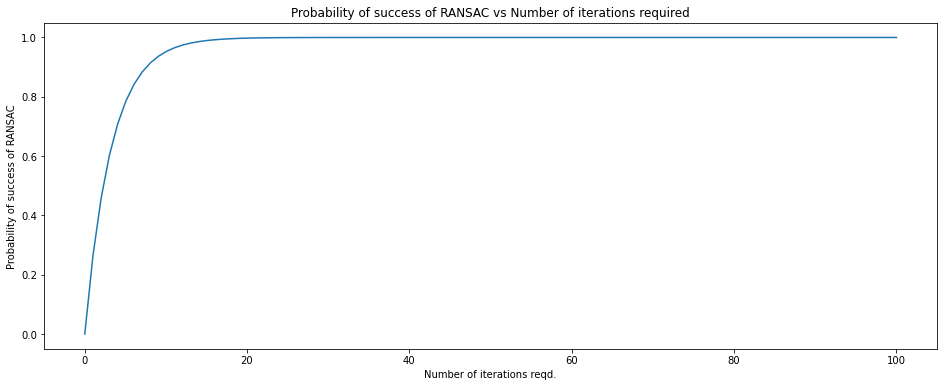

In [29]:
fig = plt.figure(figsize=(16,6)) 
e = 0.2
s = 6
iters = np.linspace(0,100,100)
prob_success = 1 - (1-(1-e)**s)**iters
plt.plot(iters,prob_success)
plt.title("Probability of success of RANSAC vs Number of iterations required")
plt.xlabel("Number of iterations reqd.")
plt.ylabel("Probability of success of RANSAC")
plt.show()

# 2) Zhang’s method

The corners in the image ../calibration-data/IMG_5456.JPG are 


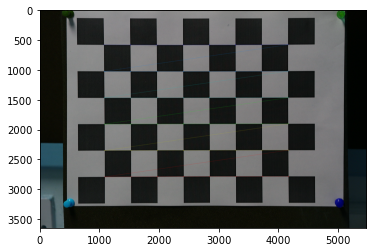

The corners in the image ../calibration-data/IMG_5457.JPG are 


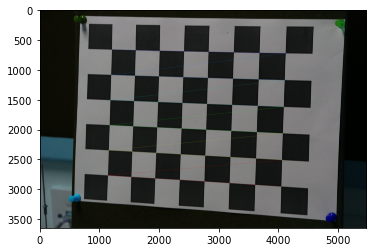

The corners in the image ../calibration-data/IMG_5458.JPG are 


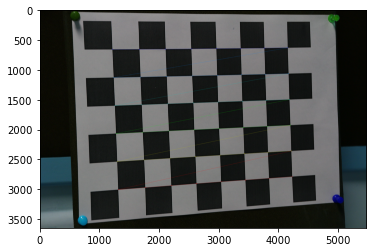

The corners in the image ../calibration-data/IMG_5459.JPG are 


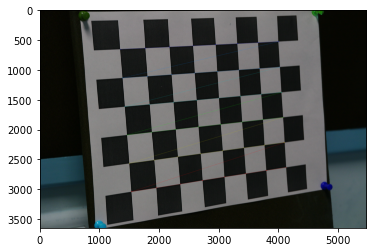

The corners in the image ../calibration-data/IMG_5460.JPG are 


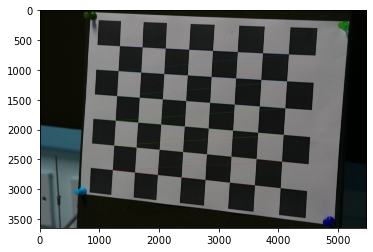

The corners in the image ../calibration-data/IMG_5461.JPG are 


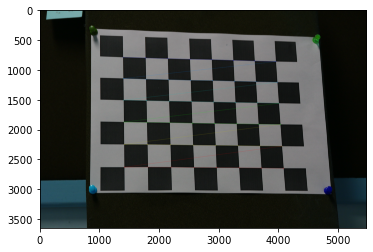

The corners in the image ../calibration-data/IMG_5462.JPG are 


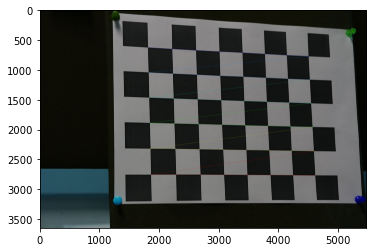

The corners in the image ../calibration-data/IMG_5463.JPG are 


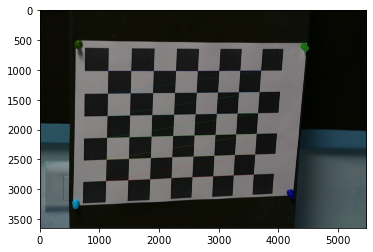

The corners in the image ../calibration-data/IMG_5464.JPG are 


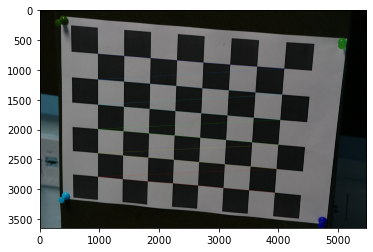

The corners in the image ../calibration-data/IMG_5465.JPG are 


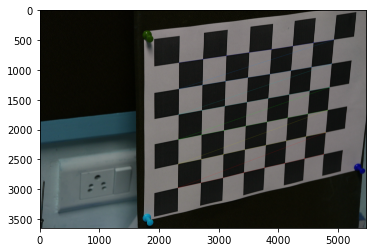

The corners in the image ../calibration-data/IMG_5466.JPG are 


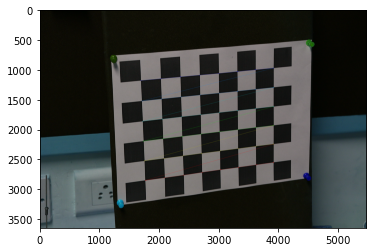

The corners in the image ../calibration-data/IMG_5467.JPG are 


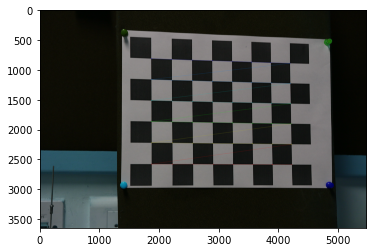

The corners in the image ../calibration-data/IMG_5468.JPG are 


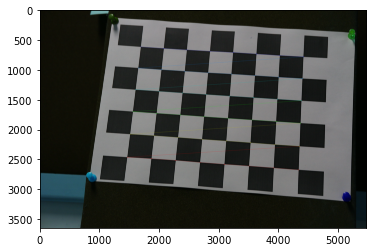

The corners in the image ../calibration-data/IMG_5469.JPG are 


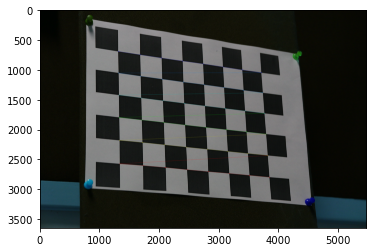

The corners in the image ../calibration-data/IMG_5470.JPG are 


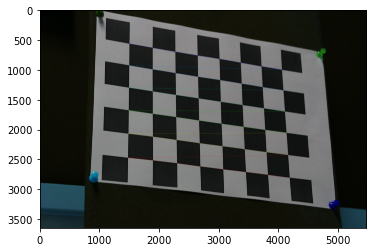

In [30]:
#Code for zhangs here

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#get images
images=[]
for i in range(56,71):
    fname ="../calibration-data/IMG_54"+str(i)+".JPG"
    images.append(fname)

# preparing object points
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


for fname in images:
    img = cv2.imread(fname)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        print("The corners in the image " + fname +" are ")
        plt.imshow(img)
        plt.show()
        cv2.waitKey(500)
cv2.destroyAllWindows();

## 2.1) Finding the Camera Matrix from Zhang's

In [31]:
#Camera matrix
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print("The camera matrix 'K' obtained using Zhang's Method is")
print(K)

The camera matrix 'K' obtained using Zhang's Method is
[[1.36415095e+04 0.00000000e+00 3.31635924e+03]
 [0.00000000e+00 1.36632518e+04 1.50037425e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


## 2.2) Overlaying the Wireframe

The wireframe overlaid in the image is  1


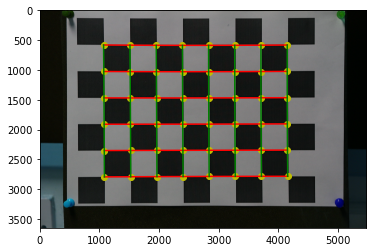

The wireframe overlaid in the image is  2


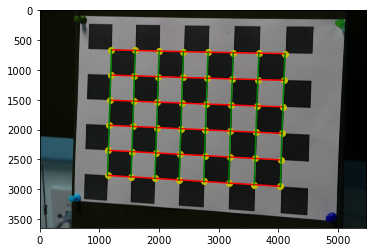

The wireframe overlaid in the image is  3


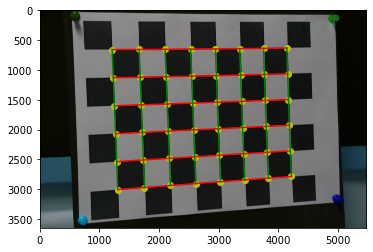

The wireframe overlaid in the image is  4


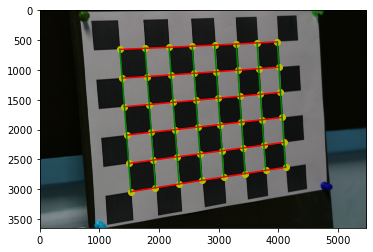

The wireframe overlaid in the image is  5


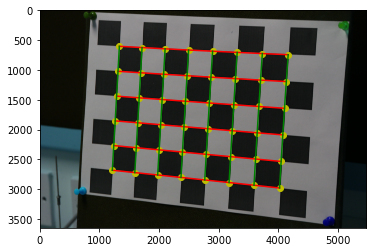

The wireframe overlaid in the image is  6


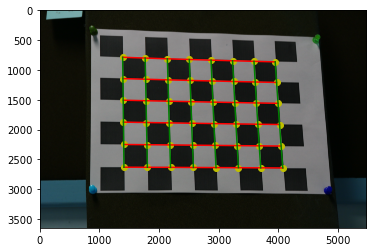

The wireframe overlaid in the image is  7


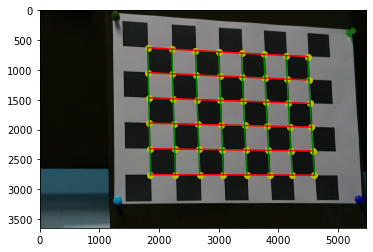

The wireframe overlaid in the image is  8


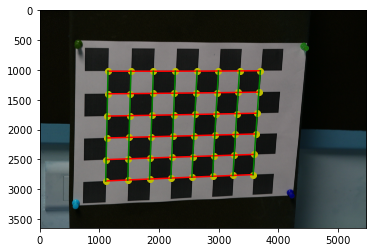

The wireframe overlaid in the image is  9


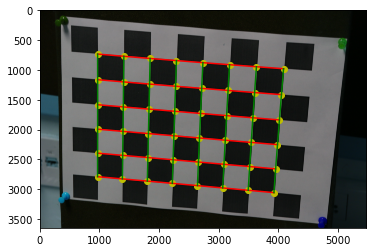

The wireframe overlaid in the image is  10


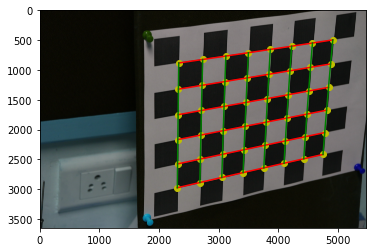

The wireframe overlaid in the image is  11


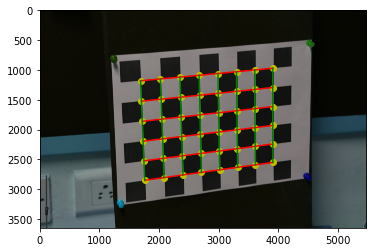

The wireframe overlaid in the image is  12


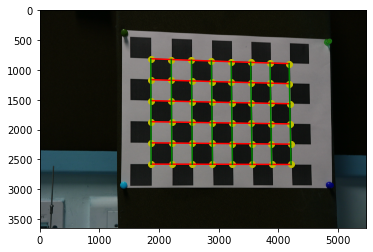

The wireframe overlaid in the image is  13


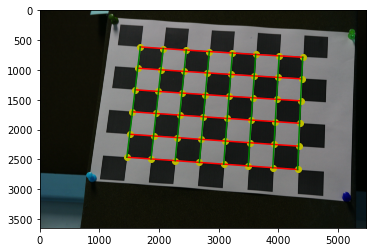

The wireframe overlaid in the image is  14


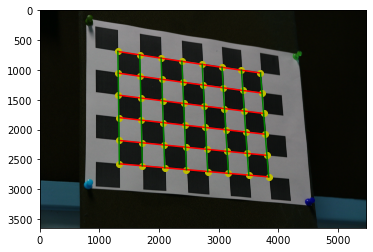

The wireframe overlaid in the image is  15


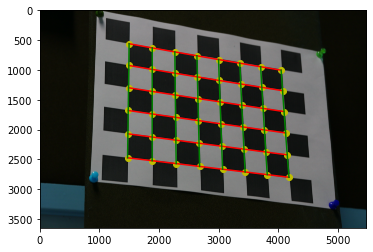

In [32]:
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
    img = cv2.imread(images[i])
    print("The wireframe overlaid in the image is ",i+1)
    plt.imshow(img)
    for i in range(6):
        plt.plot(imgpoints2[i*8:i*8+8,0,0],imgpoints2[i*8:i*8+8,0,1],'r')
    for i in range(8):
        plt.plot(imgpoints2[i::8,0,0],imgpoints2[i::8,0,1],'g')
    plt.scatter(imgpoints2[:,0,0],imgpoints2[:,0,1],c='y')
    plt.show()

### What do you observe about the overlay?

#### Answer

When the image is taken from a larger angle the wireframe doesn't fit properly. This could be arising from improper calculation of rotation and translation vectors. For more or less perpendicular images the wireframe fits exactly.

# 3) DIY

## Selcting Image points for DIY

In [33]:
#%matplotlib tk
#image_diy = []
#fig = plt.figure(figsize=(20,30))

#img=mpimg.imread('../images/diy.jpeg')

#def onclick(event):
#    ix, iy = event.xdata, event.ydata
#    print(ix, iy)
#    image_diy.append([ix, iy])

#cid = fig.canvas.mpl_connect('button_press_event', onclick)

#imgplot = plt.imshow(img)
#plt.show()

## 2D Image Points for DIY

In [34]:
image_diy = []
image_diy.append([612.9990893202713,557.1702669764763])
image_diy.append([803.2775832167082,444.0317030380545])
image_diy.append([972.9854291243413,344.60690442550185])
image_diy.append([1103.2661997200998,265.7527538017532])
image_diy.append([606.1422066573367,780.018953521853])
image_diy.append([597.5711033286683,973.7258887497572])
image_diy.append([590.7142206657337,1129.7199693315208])
image_diy.append([410.7210507636988,437.1748203751197])
image_diy.append([234.15632219313113,339.46424242830085])
image_diy.append([93.59022760297057,253.75320914161762])
x_diy = np.array(image_diy)

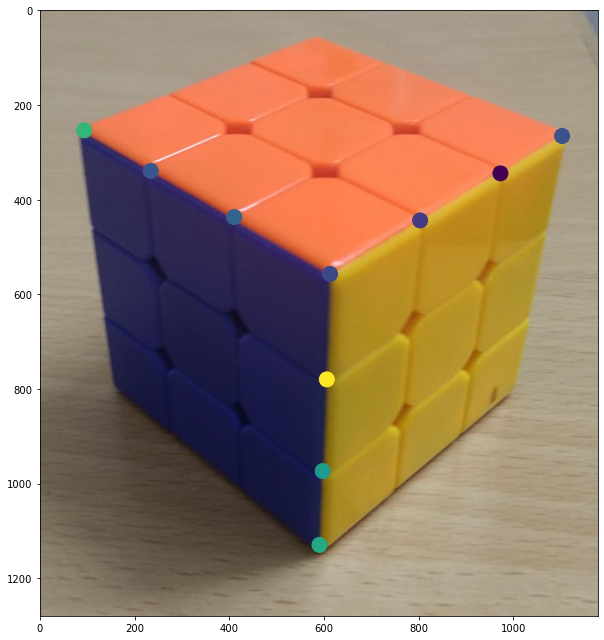

In [35]:
%matplotlib inline
N = len(image_diy)
image_diy = np.array(image_diy)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('../images/diy.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_diy[:,0], image_diy[:,1], c=colors, s=area)
plt.show()

## 3D World Points for DIY

In [36]:
X_diy = []
X_diy.append([0,0,0])
X_diy.append([1,0,0])
X_diy.append([2,0,0])
X_diy.append([3,0,0])
X_diy.append([0,1,0])
X_diy.append([0,2,0])
X_diy.append([0,3,0])
X_diy.append([0,0,1])
X_diy.append([0,0,2])
X_diy.append([0,0,3])
X_diy = 180*np.array(X_diy);

## Homogenising Image and World points for DIY

In [37]:
x_diy = hom_coords_x(x_diy)
X_diy = hom_coords_X(X_diy)

## Projection Matrix for DIY using DLT

In [38]:
P_diy = DLT(x_diy,X_diy);
print("The Matrix P in DIY is")
print(P_diy)

The Matrix P in DIY is
[[ 1.52698679e+00  2.81815310e-01 -9.13421577e-01  6.13637507e+02]
 [-3.92410526e-01  1.68054450e+00 -4.18912843e-01  5.57200021e+02]
 [ 5.58717351e-04  5.47059401e-04  5.58682508e-04  1.00000000e+00]]


## Reconstruction Error for DIY using DLT

In [39]:
error_diy = get_err(x_diy, X_diy, P_diy)
print("The Recontruction RMSE for DIY is",error_diy)

The Recontruction RMSE for DIY is 2.017156705283815


## Decomposed Projection Matrix for DIY

In [40]:
R_diy,K_diy,C_diy = RKC(P_diy);

print("\nRotation matrix R for DIY is")
print(R_diy)
print("\nCamera matrix K for DIY is ")
print(K_diy)
print("\nProjection Centre C for DIY is ")
print(C_diy)


Rotation matrix R for DIY is
[[ 0.7114619  -0.00902741 -0.70266668]
 [-0.39474285  0.82211704 -0.41024584]
 [ 0.58137771  0.56924694  0.58134145]]

Camera matrix K for DIY is 
[[1.79566959e+03 3.79330433e+00 5.38143997e+02]
 [0.00000000e+00 1.77765024e+03 5.04644192e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Projection Centre C for DIY is 
[-623.89147662 -617.2315079  -561.60467369]


## Verifying the Projection Matrix Decomposition

In [41]:
P_diy_r = np.empty((3,4));
P_diy_r[:3,:3] = K_diy@R_diy;
P_diy_r[:,-1] = -K_diy@R_diy@C_diy;
P_diy_r /= P_diy_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P1b-P1b_r)<1e-5)


The recovered P matrix from R, K, C and actual P matrix is same : True


## Projection Matrix for DIY using DLT RANSAC

In [42]:
P_ransac_diy, inliners_ransac_diy, err_ransac_diy = RANSAC(x_diy,X_diy,3,4,7,2,2,2,1000)
print("\n The Projection Matrix P for DIY using DLT RANSAC")
print(P_ransac_diy)
print("\nFinally Number of inliners for DIY using DLT RANSAC = ",inliners_ransac_diy)
print("\nFinally RMSE for DIY using DLT RANSAC = ",err_ransac_diy)


 The Projection Matrix P for DIY using DLT RANSAC
0

Finally Number of inliners for DIY using DLT RANSAC =  6

Finally RMSE for DIY using DLT RANSAC =  100


## Decomposed Projection Matrix for DIY using DLT RANSAC

In [43]:
R_ransac_diy,K_ransac_diy,C_ransac_diy = RKC(P_ransac_diy);

print("\nRotation matrix R for DIY RANSAC is")
print(R_ransac_diy)
print("\nCamera matrix K for DIY RANSAC is ")
print(K_ransac_diy)
print("\nProjection Centre C for DIY RANSAC is ")
print(C_ransac_diy)

TypeError: 'int' object is not subscriptable

## Verifying the Projection Matrix Decomposition

In [ ]:
P_ransac_diy_r = np.empty((3,4));
P_ransac_diy_r[:3,:3] = K_ransac_diy@R_ransac_diy;
P_ransac_diy_r[:,-1] = -K_ransac_diy@R_ransac_diy@C_ransac_diy;
P_ransac_diy_r /= P_ransac_diy_r[-1,-1]
print("\nThe recovered P matrix from R, K, C and actual P matrix is same :",np.linalg.norm(P_ransac_diy-P_ransac_diy_r)<1e-5)